# Supervised, unsupervised and reinforcement learning
This notebook will cover some examples of the concepts about supervised and unsupervised learning

In [61]:
# All imports needed for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

## Supervised learning example
Here we import a wine dataset used for supervised classification. The dataset is quite small, only 178 different wines. Our job is to classify an instance of a wine as one out of three different wine types/classes

In [38]:
# We import the dataset and call it by the name "wine"
wine = load_wine()

In [39]:
# This is what it looks like! A lot of information, but we just need some of it
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [40]:
# It is nice to create a Pandas Dataframe from the data
# The data we need is from the wine-dictionary on the keys "data" (the features) and "target" (the labels)
# np.c_ is a numpy function to concatenate (merge) the two arrays together
# To get columns names, we get the "feature_names" and "target" from the wine-variable

df = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [88]:
# Here is an overview of the dataset
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [42]:
# And some statistaaaackss ("Check the statistacccs" -Big Shaq, Man's Not Hot)
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [43]:
# We split the dataset into X (features) and y (labels)
X, y = df[wine['feature_names']], df['target']

In [44]:
# We want to train on 80% of the data, and test on 20% of the data
# The split is done in a stratified manner, meaning that the distribution of labels is intact after the split
# This means that if the dataset contains 50% of wine1, 10% of wine2 and 40% of wine3, 
# then these percentages will be kept after the split
# Why? Because we could end up with a X_test and y_test that only contains wine1 and wine3, and that is not good

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
# Just to check that the split is successfull
print(len(X_train), len(y_train), len(X_test), len(y_test))

142 142 36 36


In [46]:
# We import a decision tree from sklearn
dt_model = DecisionTreeClassifier(random_state=42)

# The .fit function trains the model on the training data
dt_model.fit(X_train, y_train)

# The .predict function is used on the already trained model (from previous step), and is now used to predict the data
# of the test-data (but only X_test, which is the features. The labels in y_test is a secret for now)
# The output of this ("predictions") is an array with the labels predicted by the model
predictions = dt_model.predict(X_test)

In [47]:
# This is just to print so you can see the content of your predictions and the y_test (which is the correct answers). 
# See any differences?
print(predictions.tolist())
print(y_test.tolist())

[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 2.0, 1.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.0, 2.0, 1.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 2.0, 1.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.0, 2.0, 1.0, 2.0, 2.0, 2.0]


In [48]:
# We check the performance of our predictions by using accuracy score (imported from sklearn)
# Quite good score
accuracy_score(y_test, predictions)

0.9444444444444444

## Unsupervised learning
For this task we will create some datapoints (blobs) in clusters. We can define number of datapoints, clusters and density ourself. Then we will use K-means clustering to cluster the datapoints.

Explore how changing the number of centers when creating the dataset and the number of clusters in the K-means model will change the output.

In [83]:
# Lets create some data
# Here we create 5000 datapoints and we have 3 centers
# We get X, but dont need the y (which will tell us what cluster the datapoint "really" belonged to)
# This y (labels) is often not known when applied in industri etc.

X, _ = make_blobs(n_samples=5000, centers=3, cluster_std=0.60, random_state=0)

In [84]:
# The data is just some coordinates in a 2D array
X

array([[ 1.9938053 ,  0.5257808 ],
       [-1.89657262,  2.3925938 ],
       [-1.74817656,  3.36582105],
       ...,
       [-0.19318278,  3.10249179],
       [-2.30404673,  3.0518701 ],
       [-2.40559954,  3.5250349 ]])

In [85]:
# Import K-means and initialize with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

In [86]:
# Predict the labels of clusters by using .fit_predict function
label = kmeans.fit_predict(X)
 
# Getting unique labels by using np.unique from numpy
u_labels = np.unique(label)

# Getting the Centroids
centroids = kmeans.cluster_centers_

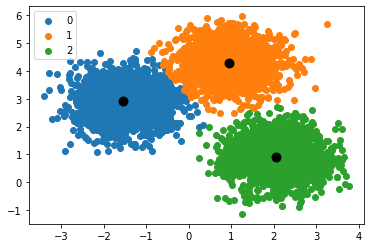

In [87]:
# Plotting the results by using matplotlib

# Plot the blobs/datapoints
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)

# Plot the centers of the clusters
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')

plt.legend()
plt.show()